<a href="https://colab.research.google.com/github/Vulter3653/ML/blob/main/Fruits_apple_pineapple_banana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# chapter 06. 비지도 학습

# 6-1 군집 알고리즘
# 타깃을 모를 때 사용하는 방법 -> 비지도 학습

In [ ]:
# 과일 사진 데이터 준비하기 (#'!' 문자로 시작하면 리눅스 명령으로 이해함)
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-06-28 07:56:26--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-28 07:56:26--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-28 07:56:27--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... c

In [ ]:
# 넘파이 & 맷플롯립 패키지 임포트
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
print(fruits.shape)
#(샘플의 개수, 이미지 높이, 이미지 너비) -> 300개 샘플의 100*100 의 이미지

(300, 100, 100)


In [ ]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


<function matplotlib.pyplot.show>

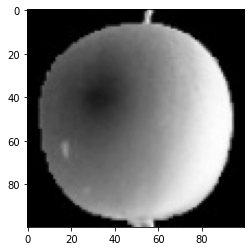

In [ ]:
plt.imshow(fruits[0],cmap='gray')
plt.show
#0에 가까울 수록 검게, 높은 값은 밝게 표시 -> 컴퓨터가 계산을 위해서 사과에 집중하기 위해

<function matplotlib.pyplot.show>

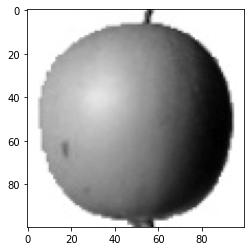

In [ ]:
plt.imshow(fruits[0],cmap='gray_r')
plt.show

<function matplotlib.pyplot.show>

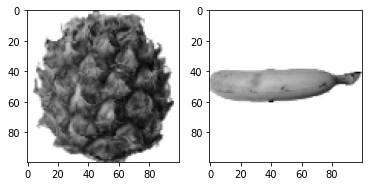

In [ ]:
fig, axs = plt.subplots(1,2) #subplot() -> 여러 개의 그래프를 배열처럼 1행 2열 선택
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show

In [ ]:
# 픽셀값 분석하기 (100*100 이미지를 길이가 10,000인 1차원으로)
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [ ]:
print(apple.shape)

(100, 10000)


In [ ]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


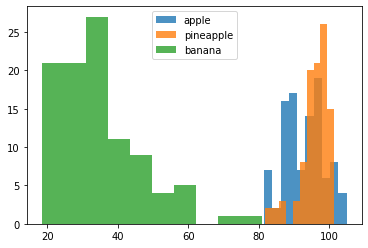

In [ ]:
plt.hist(np.mean(apple, axis=1),alpha=0.8)
plt.hist(np.mean(pineapple, axis=1),alpha=0.8)
plt.hist(np.mean(banana, axis=1),alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()
#바나나와는 큰 차이 but 사과와 파인애플은 샘플의 평균값으로 구분하기 힘듦

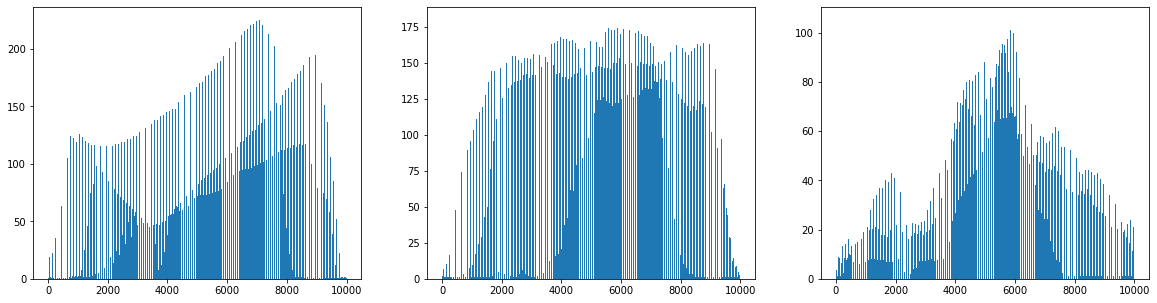

In [ ]:
fig, axs = plt.subplots(1,3,figsize =(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana ,axis=0))
plt.show()
#픽셀 10,000개에 대한 평균값을 막대그래프로 순서대로 사과, 파인애플, 바나나 그래프

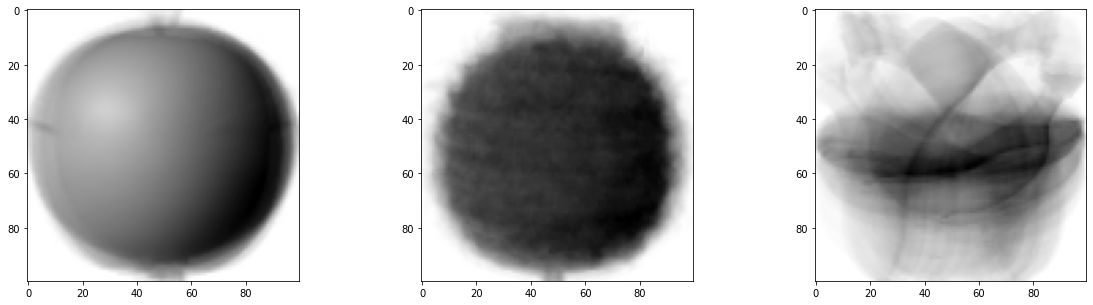

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()
#픽셀의 평균 값에 해당하는 대표 이미지 -> 이미지와 가깝다 -> 해당 과일이다

In [ ]:
abs_diff_apple = np.abs(fruits - apple_mean)
abs_mean_apple = np.mean(abs_diff_apple, axis=(1,2)) 
# 절대값 오차로 가장 가까운 사진 찾기

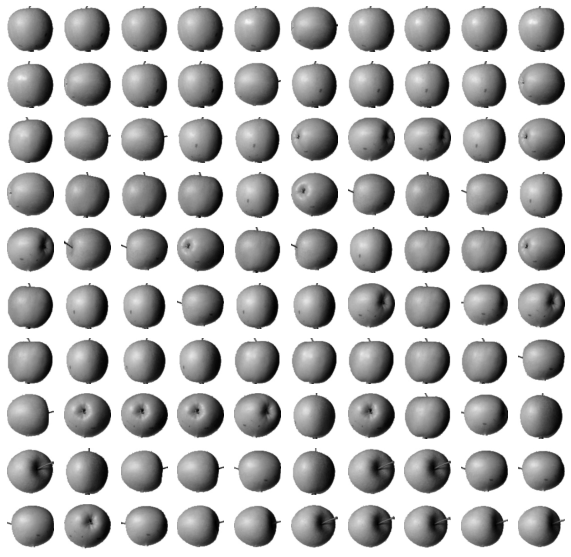

In [ ]:
apple_index = np.argsort(abs_mean_apple)[:100]
#apple_maen과 가장 절대값 오차가 적은 샘플 100개를 선택
#np.argsort() 함수는 작은 것에서 큰 순서대로 나열해서 반환
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10) :
  for j in range(10) :
    axs[i, j]. imshow(fruits[apple_index[10*i + j]], cmap='gray_r')
    axs[i, j].axis('off') 
plt.show()

In [ ]:
abs_diff_pineapple = np.abs(fruits - pineapple_mean)
abs_mean_pineapple = np.mean(abs_diff_pineapple, axis=(1,2)) 
# 절대값 오차로 가장 가까운 사진 찾기

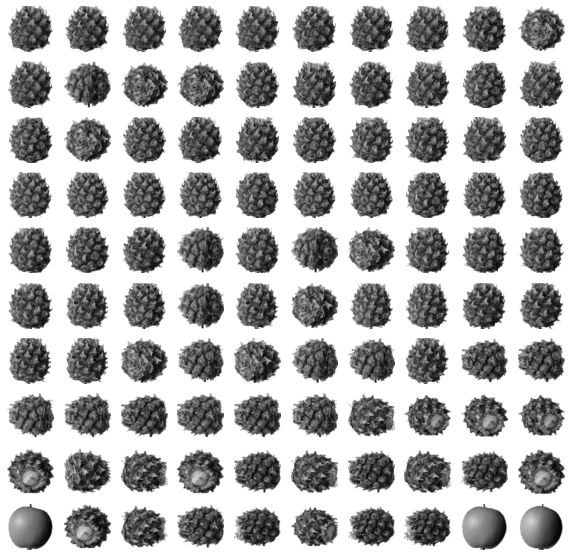

In [ ]:
pineapple_index = np.argsort(abs_mean_pineapple)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10) :
  for j in range(10) :
    axs[i, j]. imshow(fruits[pineapple_index[10*i + j]], cmap='gray_r')
    axs[i, j].axis('off') 
plt.show()

In [ ]:
abs_diff_banana = np.abs(fruits - banana_mean)
abs_mean_banana = np.mean(abs_diff_banana, axis=(1,2)) 
# 절대값 오차로 가장 가까운 사진 찾기

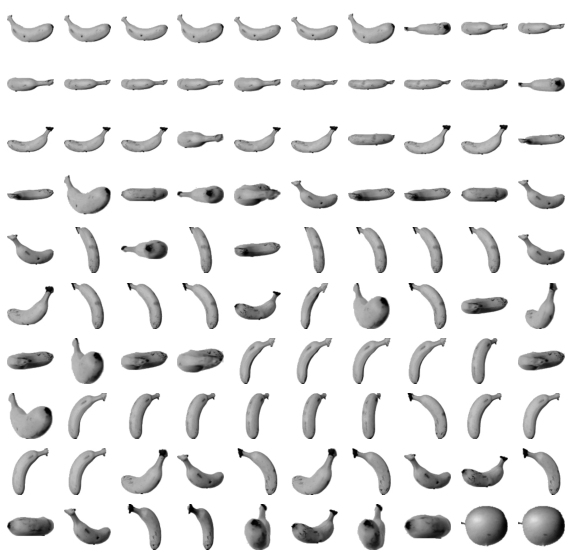

In [ ]:
banana_index = np.argsort(abs_mean_banana)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10) :
  for j in range(10) :
    axs[i, j]. imshow(fruits[banana_index[10*i + j]], cmap='gray_r')
    axs[i, j].axis('off') 
plt.show()

In [ ]:
# 한계

# 실제 비지도 학습에서는 어떤 과일 사진을 올릴지 미리 예상할수 없음
# 대표적인 비지도학습 -> '군집' : 비슷한 샘플끼리 그룹으로 모아주는 작업
# 하지만 샘플이 어떤 과일인지 알고 있었기에 각 과일 사진의 평균값을 알 수 있었음

--2022-06-28 08:36:25--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-28 08:36:25--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-28 08:36:25--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

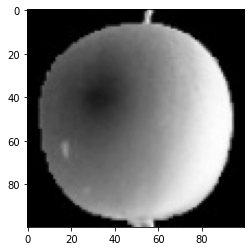

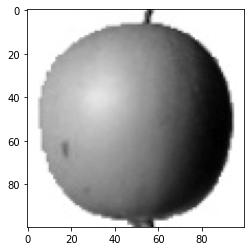

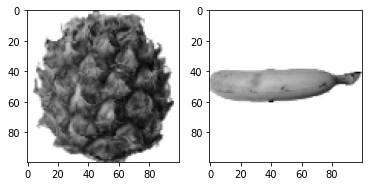

(100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


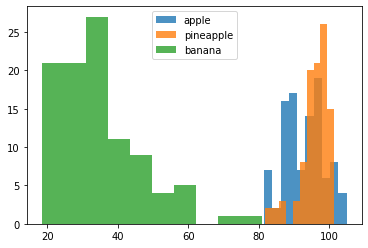

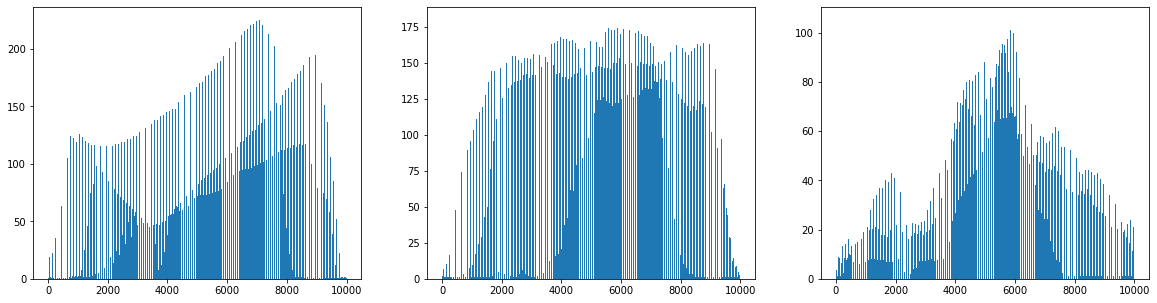

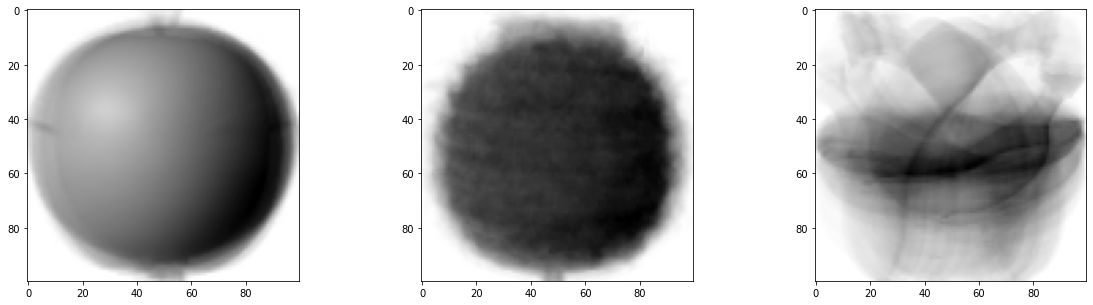

(300,)


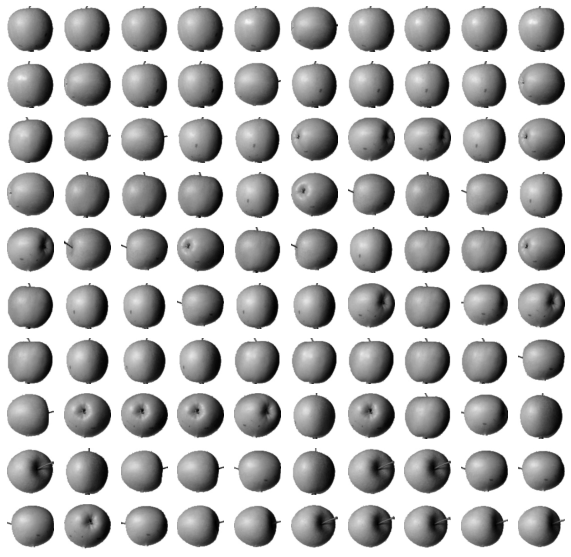

In [ ]:
# 전체 소스 코드_P.299

# 군집 알고리즘

## 과일 사진 데이터 준비하기

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')

print(fruits.shape)

print(fruits[0, 0, :])

plt.imshow(fruits[0], cmap='gray')
plt.show()

plt.imshow(fruits[0], cmap='gray_r')
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 픽셀값 분석하기

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)

print(apple.mean(axis=1))

plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

In [ ]:
# 6-2 k-평균
# k-평균 알고리즘의 작동 방식
# 1. 무작위로 k개의 클러스트 중심을 정합니다.
# 2. 각 샘플에서 가장 가까운 클로스터 중심을 찾아 해당 클러스터의 샘플로 지정합니다.
# 3. 클러스터에 속한 샘플의 평균값으로 클러스트 중심을 변경합니다.
# 4. 클러스터 중심에 변화가 없을때까지 2번으로 돌아가 반복합니다.
# 즉, 그룹을 묶고 평균을 구하고 묶고 평균을 구해서 가장 가까운 샘플의 중심을 찾는 방법

In [ ]:
# KMeans 클래스
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-06-28 08:46:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-28 08:46:09--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-28 08:46:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
#클러스트가 3이기에 3종류로 묶음
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(km.labels_)
#분류는 되었지만 어떤 종류인지는 알 수 없음

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))
#각각 몇개인지 확인 0이 111개, 1이 98개, 2가 91개로 묶임

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) #n은 샘플의 개수입니다.

    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))

    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

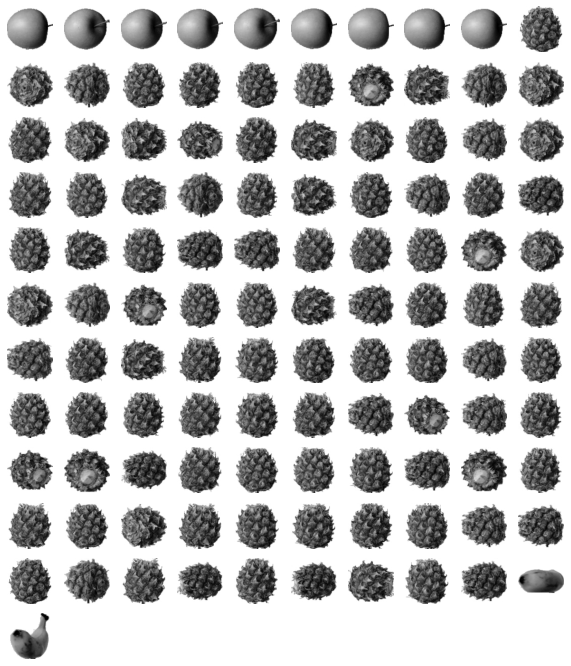

In [ ]:
draw_fruits(fruits[km.labels_==0])

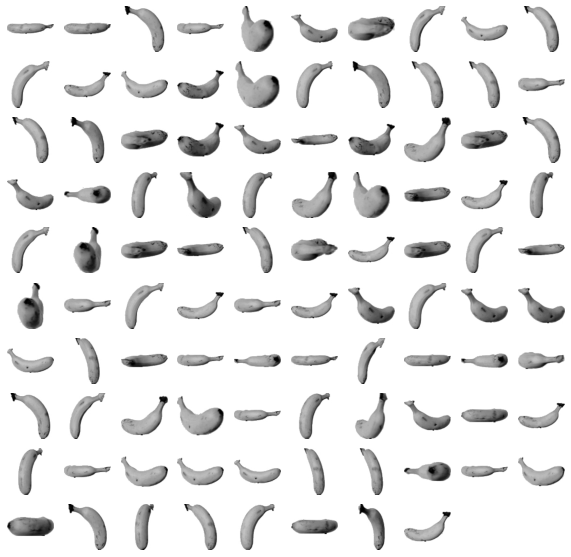

In [ ]:
draw_fruits(fruits[km.labels_==1])

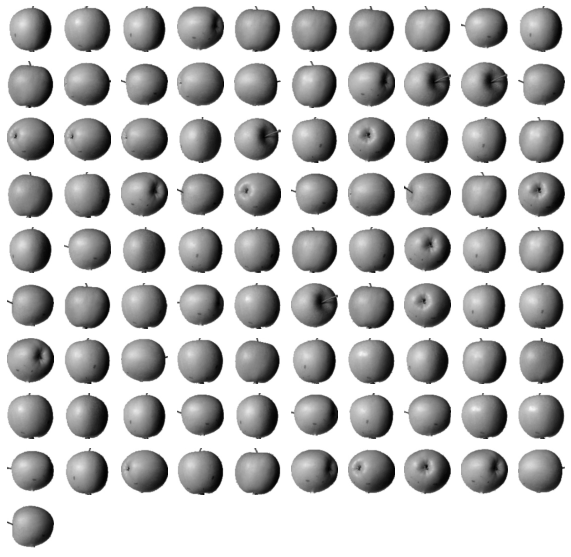

In [ ]:
draw_fruits(fruits[km.labels_==2])

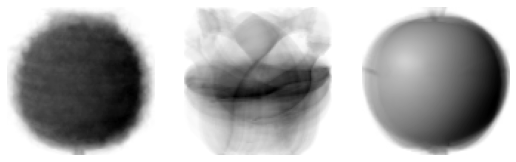

In [ ]:
# 클러스터 중심
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)
# 저장되어있는 클러스터 중심을 100*100 크기의 2차원 배열로
# 6-1 군집 알고리즘에서 본 평균값 사진과 매우 유사

In [ ]:
print(km.transform(fruits_2d[100:101]))
# 각각의 클러스터 중심까지의 거리를 계산
# 이 경우 1번과의 거리가 3393으로 가장 가까우니 0번에 속한 것으로 예상

[[3393.8136117  8837.37750892 5267.70439881]]


In [ ]:
print(km.predict(fruits_2d[100:101]))
# 0번에 속한 것으로 예측 -> 0번이 파인애플이였으니 파인애플 일 것

[0]


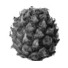

In [ ]:
draw_fruits(fruits[100:101])
# 확인한 결과 예상대로 파인애플인 것을 알 수 있음

In [ ]:
print(km.n_iter_)
# 알고리즘이 반복한 횟수는 4회

4


In [ ]:
# 최적의 k 찾기
# 실전에서는 몇개의 클러스트가 있는지 알 수 없음 (몇개의 그룹으로 나눌지 예측 불가)
# 이때 대표적인 방법이 '엘보우' 방법
# k-평균 알고리즘은 중심과 샘플 사이의 거리를 알 수 있음
# 이때 거리 제곱의 합을 "이너셔"라고 부름
# 샘플과의 거리가 낮다 -> 이너셔가 낮다 -> 최적의 클러스트를 찾을 수 있음
# 이때 꺾이는 지점이 적절한 클러스트 개수 k가 될 수 있음
# 모양이 팔꿈치와 비슷해서 엘보우 방법이라고 함

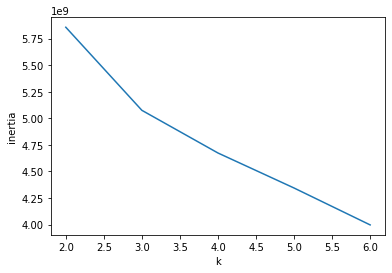

In [ ]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 이 경우 2~6번 반복했을 때 3번 반복했을 때 기울기가 달라짐
# 기울기가 3번 이상이 되면 군집효과가 줄어드는 것을 통해 3번이 가장 최적

--2022-06-28 09:22:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-28 09:22:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-28 09:22:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

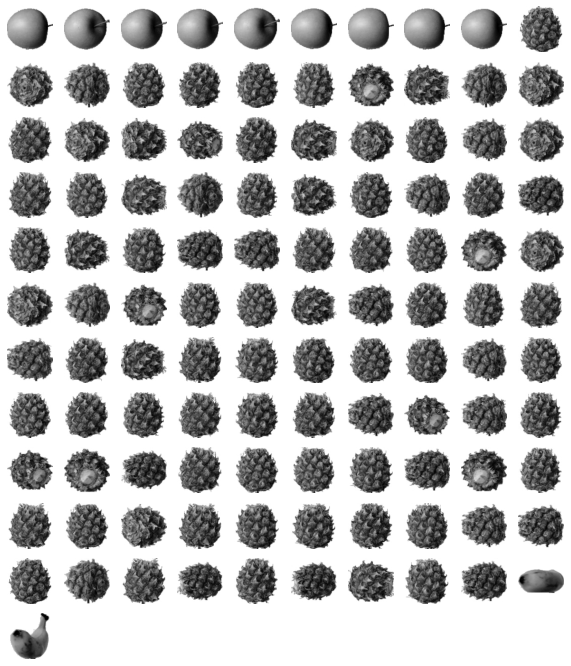

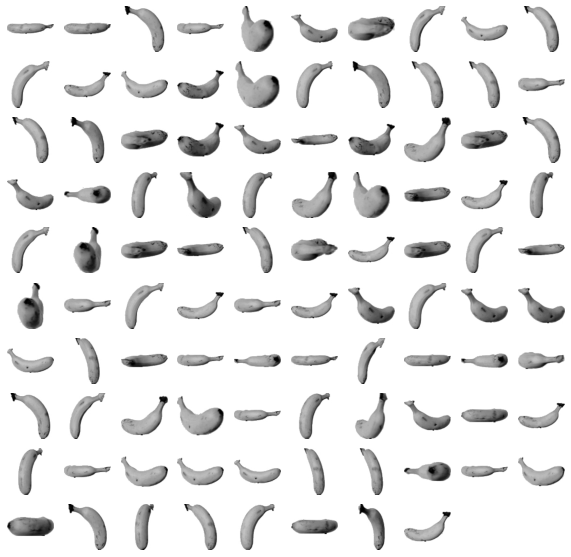

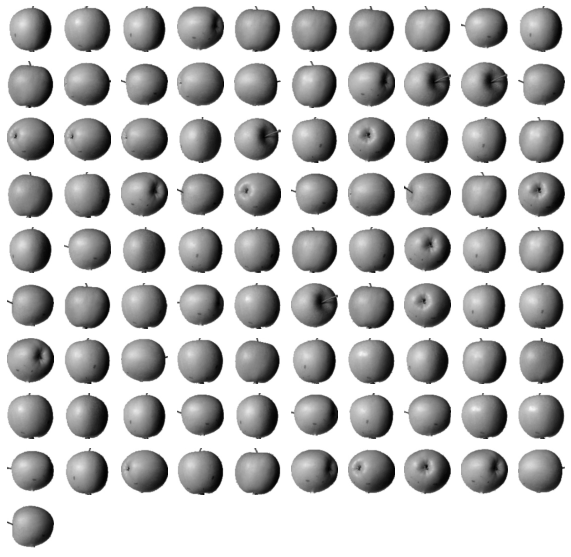

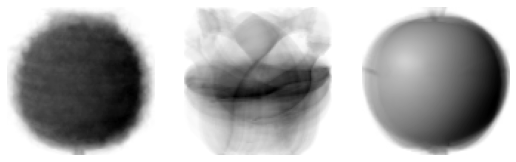

[[3393.8136117  8837.37750892 5267.70439881]]
[0]


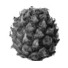

4


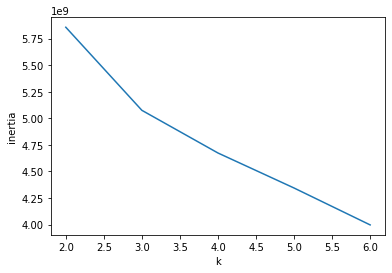

In [ ]:
# 전체 소스 코드_P.314

# K-평균

## KMeans 클래스

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

print(km.labels_)

print(np.unique(km.labels_, return_counts=True))

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(fruits[km.labels_==0])

draw_fruits(fruits[km.labels_==1])

draw_fruits(fruits[km.labels_==2])

## 클러스터 중심

draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

print(km.transform(fruits_2d[100:101]))

print(km.predict(fruits_2d[100:101]))

draw_fruits(fruits[100:101])

print(km.n_iter_)

## 최적의 k 찾기

inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [ ]:
# 6-3 주성분 분석

In [ ]:
# 차원과 차원축소
# 머신러닝에서는 데이터가 가진 속성을 '차원'이라고 부름
# 차원을 줄일 수 있다면 저장 공간 절약, 성능 향상, 속도 향상이 가능

In [ ]:
# 주성분이란?
# 데이터에 있는 분산이 큰 방향을 찾는 것
# 데이터의 분포를 가장 잘 표현하는 방향을 찾는 것
# 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 감소

In [ ]:
# PCA 클래스 (주성분 분석)

#데이터 준비
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-06-28 09:35:29--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-28 09:35:29--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-28 09:35:29--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
# 주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
#주성분의 차원의 개수는 50

pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)
# PCA 클래스가 찾은 주성분의 크기 확인

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) #n은 샘플의 개수입니다.

    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))

    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

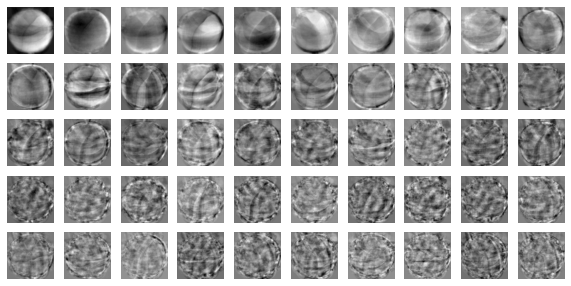

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
#pca.transform()함수를 통해 (300,10000) 크기 배열을 (300, 50)으로 축소

(300, 50)


In [ ]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
#inverse_transform()함수를 통해 10,000개의 특성을 복원

(300, 10000)


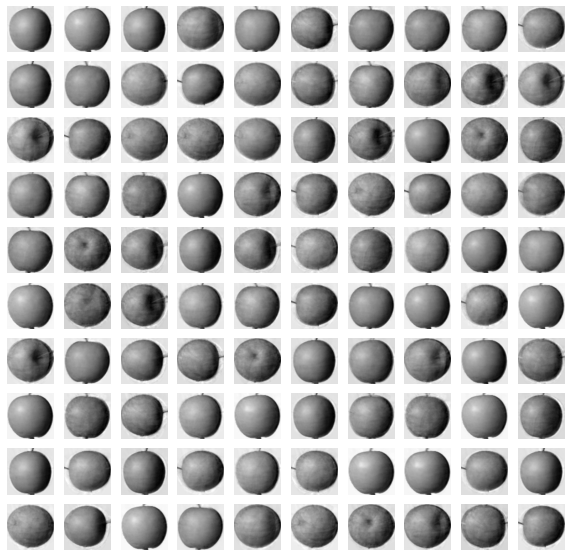

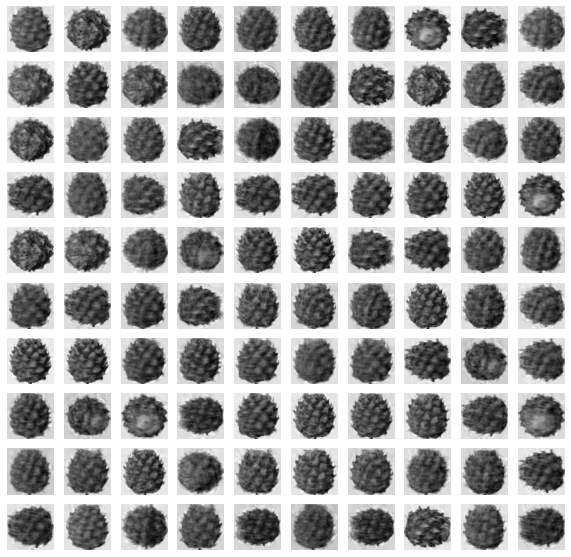

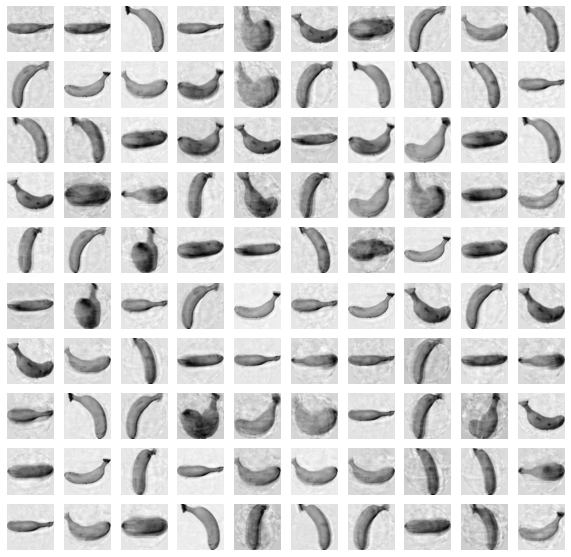

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [ ]:
# 설명된 분산
# 주성분이 원본 데이터의 부산을 얼마나 잘 나타내는지 기록한 값을 '설명된 분산'

print(np.sum(pca.explained_variance_ratio_))
# 50개의 주성분으로 92%의 분산을 유지하고 있는 것을 알 수 있음

0.9215043719257402


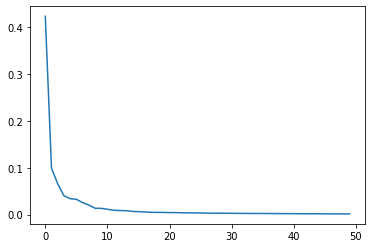

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 주성분 중 앞의 10개가 대부분의 분산을 표현하는 것을 알 수 있음

In [ ]:
# 다른 알고리즘과 함께 사용하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
# 지도 학습 모델을 위해 타깃값을 지정

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 교차 검증의 점수 약 0.997로 매우 높음
# 이때 걸린 시간은 약 1.72초 소요

0.9966666666666667
1.7196038246154786


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 차원을 축소한 fruits_pca를 이용
# 정확도 100%, 소요시간 약 0.05초로 저장공간, 훈련속도, 정확도 모두에서 향상

1.0
0.0545539379119873


In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
# 설명된 분산의 50%에 달하는 주성분을 찾도록 만듬

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)
# 두 개의 특성으로만 사용해도 원본데이터의 50%의 분산을 표현 할 수있음

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 원본 데이터를 (300,2)로 축소

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#99%의 정확도, 약 0.05초 소요

0.9933333333333334
0.04844827651977539


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# 차원 축소된 데이터로 k-평균 알고리즘으로 클러스트 찾기

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


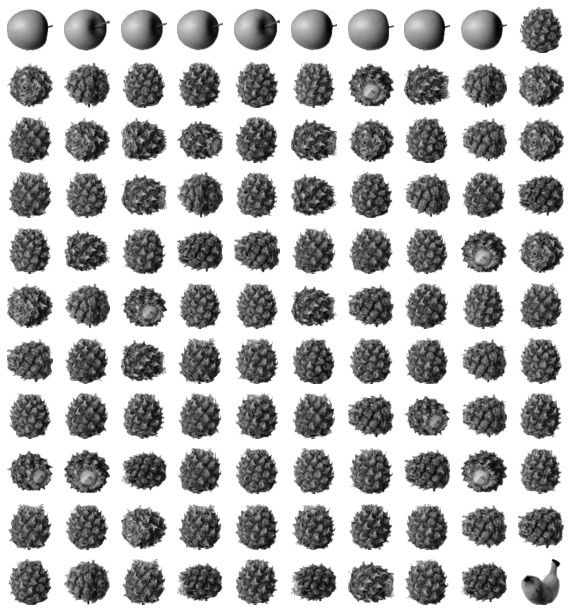

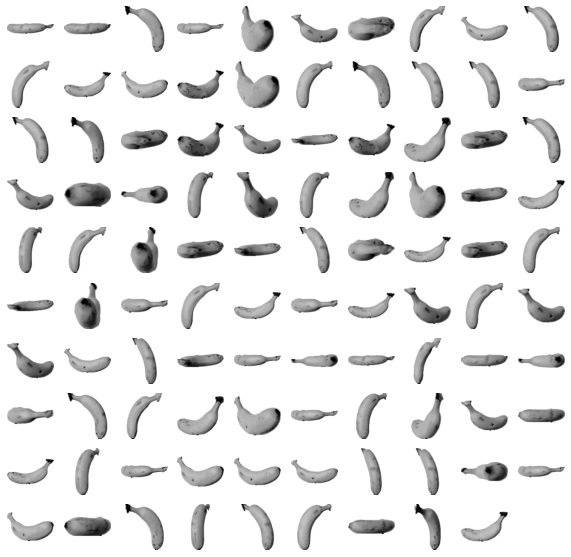

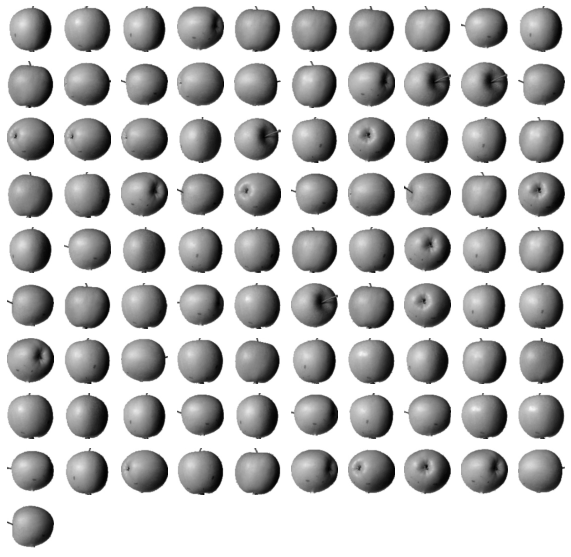

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

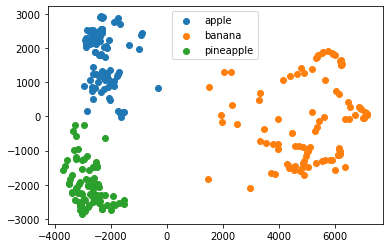

In [ ]:
# 시각화 시키기

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()